# Evalution and Analysis

## Imports:

In [1]:
from pathlib import Path
from Helper.evaluation_helpers import get_predictions, calc_metrics, error_plot,plot_metric
from Training.Helper.PyTorchModular import HORIZONS
import warnings
from matplotlib import pyplot as plt

### Supress warnings

In [2]:
warnings.filterwarnings("ignore") 

In [3]:
import numpy as np
import os
from pathlib import Path

predsPath = os.path.join('..', 'Predictions')
horizonPaths = [f'Horizon{horizon}' for horizon in HORIZONS]
for horizonPath in horizonPaths:
    print(f'{horizonPath}:')
    for i in list(Path(os.path.join(predsPath, horizonPath)).glob('*.npy')):
        data = np.load(i)
        print(f" {i.name} has {len(data)} values")  # Show length of each prediction file


Horizon1:
 ARDL_horizon_1.npy has 12 values
 ARIMA1990_horizon_1.npy has 12 values
 ARIMAX1990_horizon_1.npy has 12 values
 GRU1990_horizon_1.npy has 77 values
 LSTM_horizon_1.npy has 12 values
 MARS_horizon_1.npy has 12 values
 MLR_horizon_1.npy has 12 values
 Naive_horizon_1.npy has 12 values
 NBEATSx_horizon_1.npy has 12 values
 NHITS_horizon_1.npy has 12 values
 RFX_horizon_1.npy has 12 values
 RNN1990_horizon_1.npy has 77 values
 SARIMA1990_horizon_1.npy has 12 values
 SARIMAX1990_horizon_1.npy has 12 values
 TCN_horizon_1.npy has 12 values
 TFT_horizon_1.npy has 12 values
 Tide_horizon_1.npy has 12 values
 VARccf_horizon_1.npy has 12 values
 VARcointegration_horizon_1.npy has 12 values
 XGB1990_horizon_1.npy has 80 values
Horizon3:
 ARDL_horizon_3.npy has 12 values
 GRU1990_horizon_3.npy has 77 values
 LSTM_horizon_3.npy has 12 values
 MARS_horizon_3.npy has 12 values
 MLR_horizon_3.npy has 12 values
 Naive_horizon_3.npy has 12 values
 NBEATSx_horizon_3.npy has 12 values
 NHITS_h

In [4]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

# Horizon = 1:

,RMSE,MAE,r2
NHITS,0.13762,0.122268,0.964864
ARIMAX1990,0.261509,0.215859,0.873131
SARIMAX1990,0.269689,0.25457,0.865069
ARIMA1990,0.278222,0.22374,0.856396
Naive,0.292784,0.26025,0.84097
RFX,0.311292,0.276283,0.820229
SARIMA1990,0.33694,0.285122,0.789385
TCN,0.471641,0.399372,0.587325
VARcointegration,0.558785,0.505504,0.420741
VARccf,0.626305,0.611547,0.272295


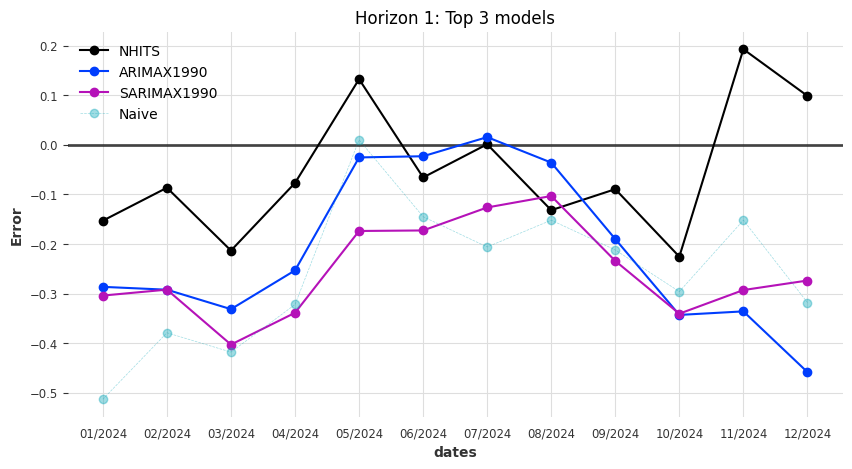

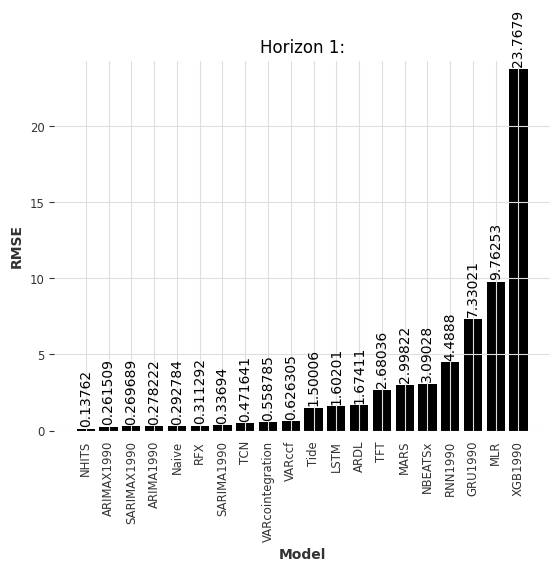

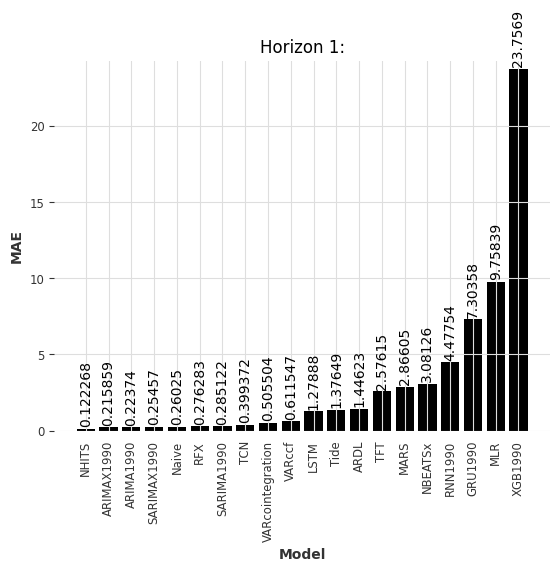

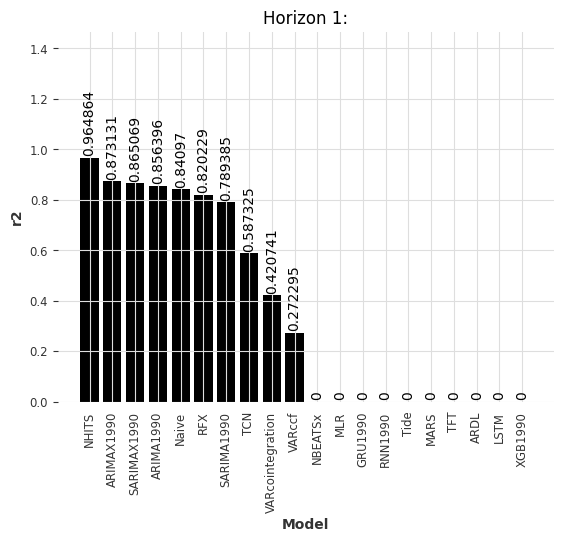

In [5]:
predsPath_1= Path('../Predictions/Horizon1')
predsDf_1=get_predictions(predsPath_1)
metrics_1= calc_metrics(predsDf_1).sort_values(main_metric, axis=0)
display(metrics_1)
# error_plot(predsDf_1,model='all',absolute=False, title= 'Horizon 1 Error plot:')
error_plot(predsDf_1,model=list(metrics_1.index.drop('Naive')[:3])+ ['Naive'],absolute=False, title= 'Horizon 1: Top 3 models')

for i in metrics_1.columns:
    plot_metric(metrics_1,i,model='all', title='Horizon 1:')

NHITS performed the best over all evalutaion metrics, by significant amounts.

# Horizon = 3:

,RMSE,MAE,r2
NHITS,0.242068,0.197035,0.891293
RFX,0.490925,0.419944,0.552889
Naive,0.616129,0.5375,0.295748
TCN,0.803654,0.692917,-0.198181
VARccf,0.835942,0.798191,-0.296393
VARcointegration,0.939982,0.879776,-0.639167
LSTM,0.960128,0.758273,-0.710182
ARDL,1.674108,1.446228,-4.199376
TFT,2.067248,1.758727,-6.928104
MARS,2.998218,2.866051,-15.676713


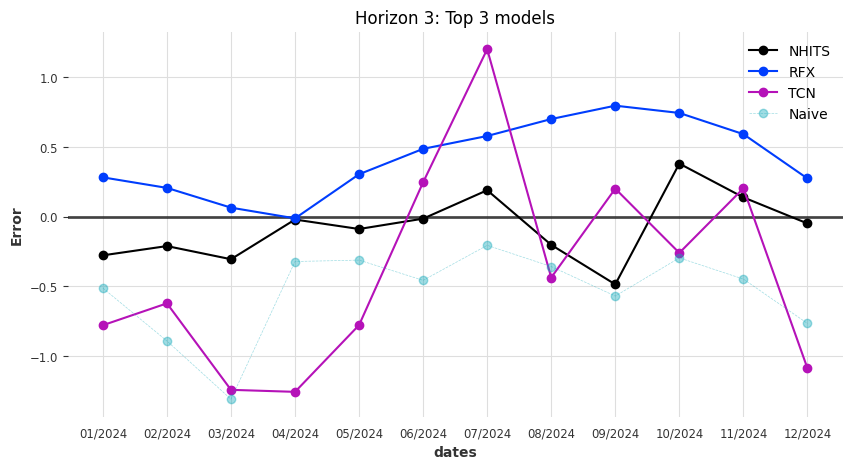

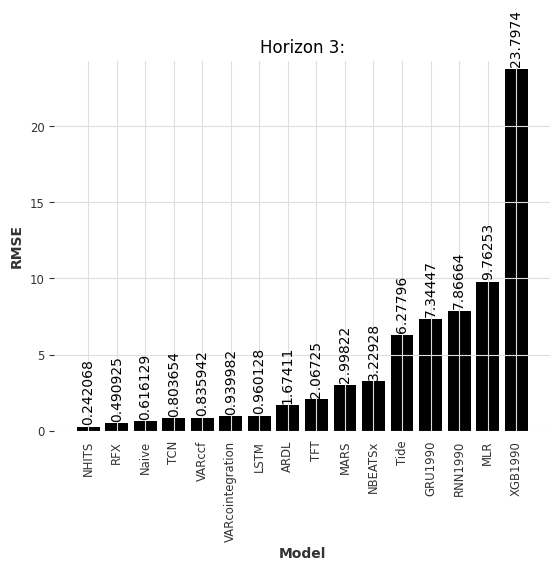

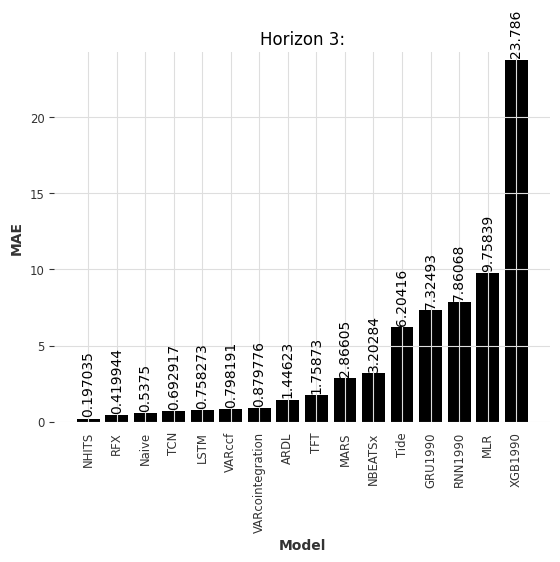

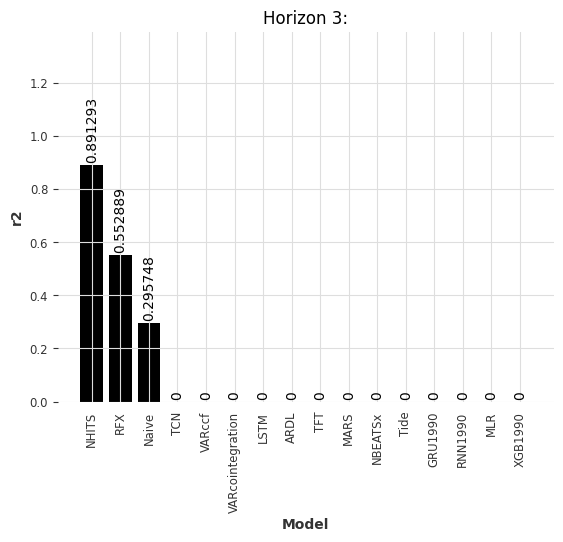

In [6]:
predsPath_3= Path('../Predictions/Horizon3')
predsDf_3=get_predictions(predsPath_3)

metrics_3= calc_metrics(predsDf_3).sort_values(main_metric, axis=0)
display(metrics_3)

# error_plot(predsDf_3,model='all',absolute=False, title= 'Horizon 3 Error plot:')
error_plot(predsDf_3,model=list(metrics_3.index.drop('Naive')[:3])+ ['Naive'],absolute=False, title= 'Horizon 3: Top 3 models')

for i in metrics_3.columns:
    plot_metric(metrics_3,i, title='Horizon 3:')

# Horizon = 6:

,RMSE,MAE,r2
NHITS,0.408752,0.346971,0.690041
TCN,0.894473,0.798288,-0.484291
RFX,1.038412,0.989768,-1.000431
Naive,1.127616,1.0075,-1.358883
VARccf,1.17718,1.109972,-1.570811
VARcointegration,1.21846,1.12629,-1.754269
ARDL,1.674108,1.446228,-4.199376
MARS,2.998218,2.866051,-15.676713
NBEATSx,3.354287,3.332967,-19.872984
TFT,4.017051,3.970676,-28.93634


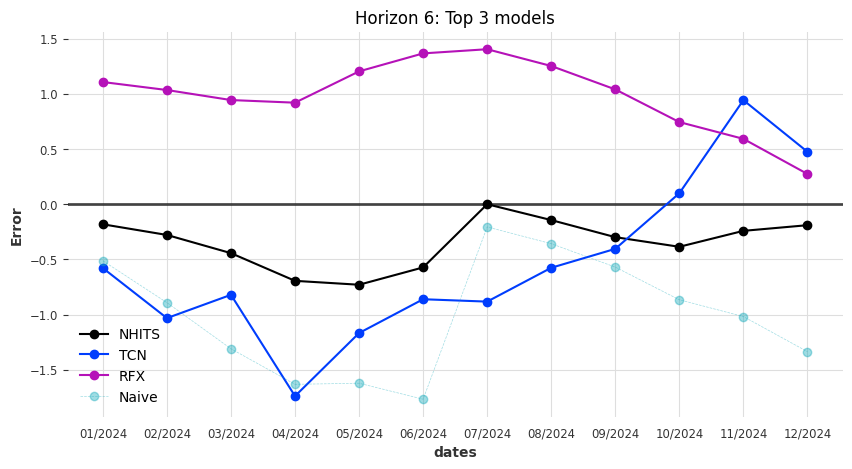

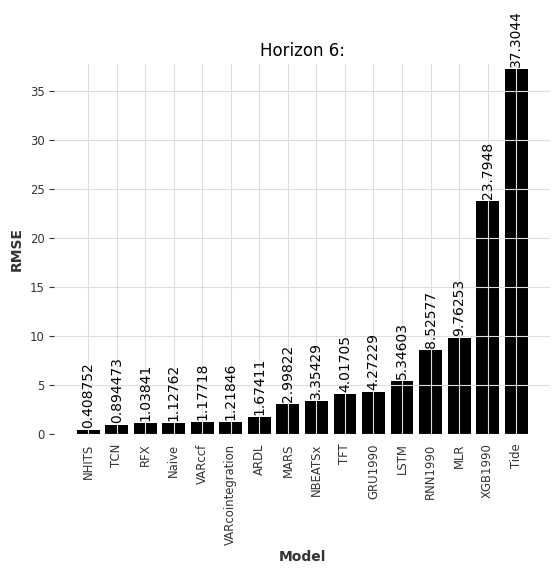

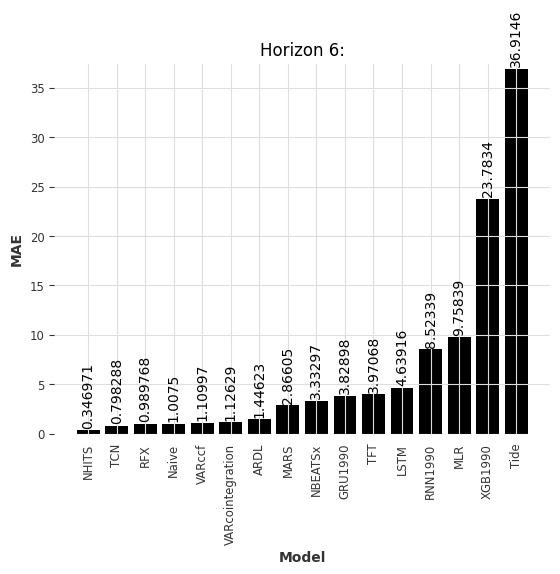

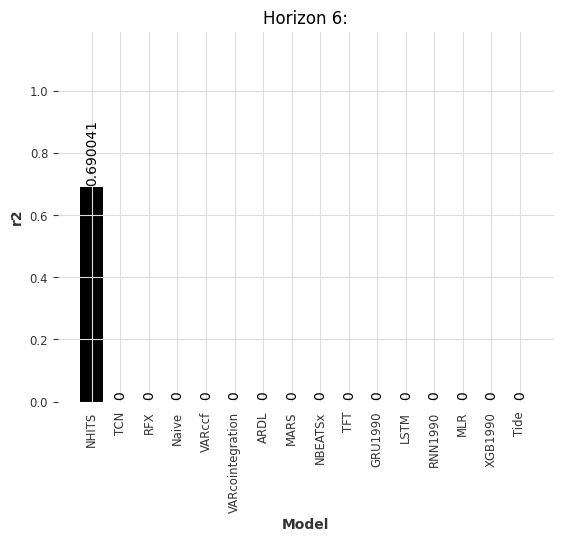

In [7]:
predsPath_6= Path('../Predictions/Horizon6')
predsDf_6=get_predictions(predsPath_6)

metrics_6= calc_metrics(predsDf_6).sort_values(main_metric, axis=0)
display(metrics_6)


error_plot(predsDf_6,model=list(metrics_6.index.drop('Naive')[:3])+ ['Naive'],absolute=False, title= 'Horizon 6: Top 3 models')

for i in metrics_6.columns:
    plot_metric(metrics_6,i, title='Horizon 6:')

# Horizon = 12:

,RMSE,MAE,r2
NHITS,0.634502,0.601707,0.25312
RFX,1.657274,1.485774,-4.095336
ARDL,1.674108,1.446228,-4.199376
VARcointegration,1.780569,1.622156,-4.881682
VARccf,1.785207,1.627247,-4.912367
Naive,2.028525,1.891,-6.633873
TCN,2.978409,2.617966,-15.457082
MARS,2.998218,2.866051,-15.676713
NBEATSx,3.811915,3.808025,-25.956938
TFT,4.180308,3.922822,-31.419083


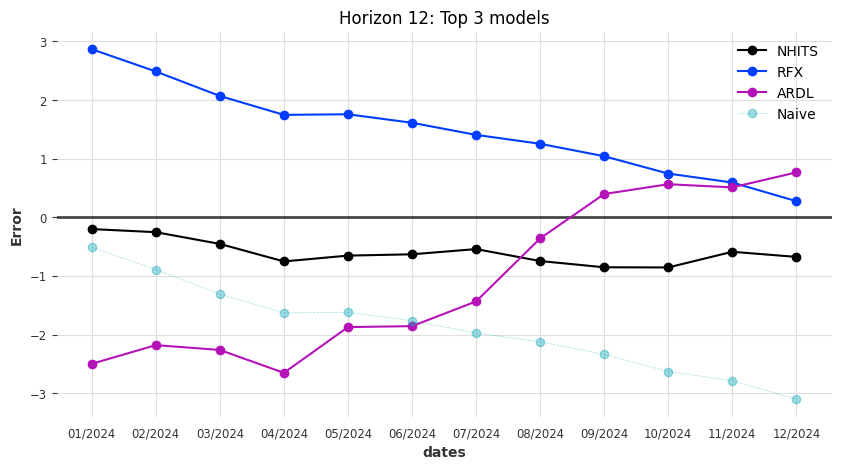

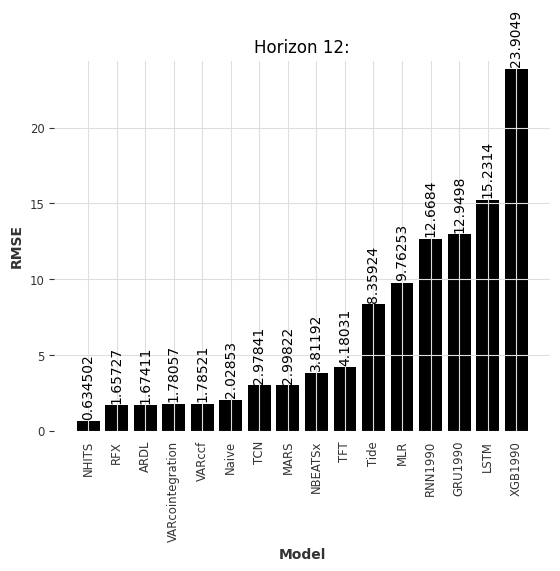

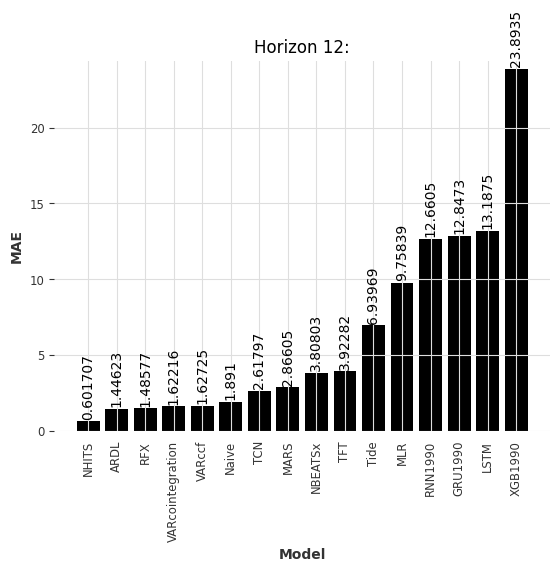

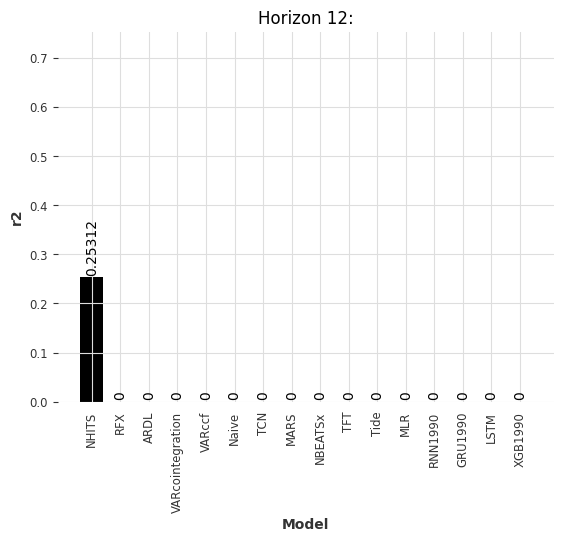

In [8]:
predsPath_12= Path('../Predictions/Horizon12')
predsDf_12=get_predictions(predsPath_12)

metrics_12= calc_metrics(predsDf_12).sort_values(main_metric, axis=0)
display(metrics_12)

# error_plot(predsDf_12,model='all',absolute=False, title= 'Horizon 12 Error plot:')
error_plot(predsDf_12,model=list(metrics_12.index.drop('Naive')[:3])+ ['Naive'],absolute=False, title= 'Horizon 12: Top 3 models')

for i in metrics_12.columns:
    plot_metric(metrics_12,i, title='Horizon 12:')

## Overall analysis:

NHITS was the only model that was significantly better, with a 5% significance level than the naive model for all horizons. Some models were better, but were not significantly better.

Almost all deeplearning and machine learning models have overwhelmingly underperformed.
